# 기계학습및실습 2024년 2학기 중간과제
*2021100936 인공지능융합학부 차상호*
* 로지스틱 회귀 모델을 사용하여 타이타닉 데이터셋에서 승객의 생존 여부를 예측하는 모델을 만들었다.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("./data/train.csv", index_col="PassengerId")
df_test = pd.read_csv("./data/test.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


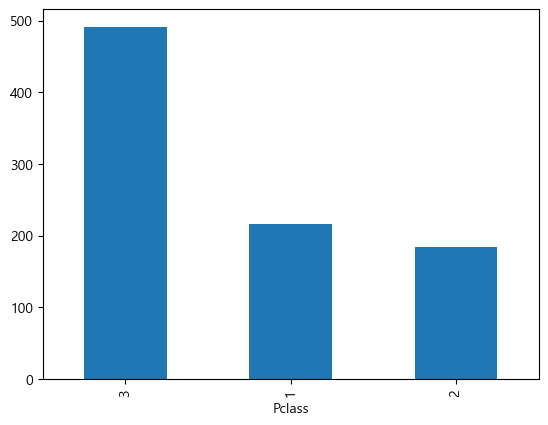

In [19]:
df["Pclass"].value_counts().plot(kind="bar", x="Pclass")
plt.show()

In [20]:
df["Pclass"].value_counts() # 클래스 별로 몇명이 있는지 확인

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [21]:
sorted_pclass_3 = df[(df['Pclass'] == 3) & (df['Fare'] > 0)].sort_values(by='Fare', ascending=True)
print(sorted_pclass_3.to_string(max_rows=10))
average_fare_pclass_3 = sorted_pclass_3['Fare'].mean()
print(f"3등급 승객들의 평균 요금 = {average_fare_pclass_3}")

             Survived  Pclass                               Name     Sex   Age  SibSp  Parch    Ticket     Fare Cabin Embarked
PassengerId                                                                                                                   
379                 0       3                Betros, Mr. Tannous    male  20.0      0      0      2648   4.0125   NaN        C
327                 0       3          Nysveen, Mr. Johan Hansen    male  61.0      0      0    345364   6.2375   NaN        S
844                 0       3         Lemberopolous, Mr. Peter L    male  34.5      0      0      2683   6.4375   NaN        C
819                 0       3   Holm, Mr. John Fredrik Alexander    male  43.0      0      0    C 7075   6.4500   NaN        S
372                 0       3          Wiklund, Mr. Jakob Alfred    male  18.0      1      0   3101267   6.4958   NaN        S
...               ...     ...                                ...     ...   ...    ...    ...       ...      ...

In [22]:
sorted_pclass_2 = df[(df['Pclass'] == 2) & (df['Fare'] > 0)].sort_values(by='Fare', ascending=True)
print(sorted_pclass_2.to_string(max_rows=10))
average_fare_pclass_2 = sorted_pclass_2['Fare'].mean()
print(f"2등급 승객들의 평균 요금 = {average_fare_pclass_2}")

             Survived  Pclass                          Name     Sex   Age  SibSp  Parch        Ticket  Fare Cabin Embarked
PassengerId                                                                                                               
34                  0       2         Wheadon, Mr. Edward H    male  66.0      0      0    C.A. 24579  10.5   NaN        S
85                  1       2           Ilett, Miss. Bertha  female  17.0      0      0    SO/C 14885  10.5   NaN        S
67                  1       2  Nye, Mrs. (Elizabeth Ramell)  female  29.0      0      0    C.A. 29395  10.5   F33        S
57                  1       2             Rugg, Miss. Emily  female  21.0      0      0    C.A. 31026  10.5   NaN        S
71                  0       2    Jenkin, Mr. Stephen Curnow    male  32.0      0      0    C.A. 33111  10.5   NaN        S
...               ...     ...                           ...     ...   ...    ...    ...           ...   ...   ...      ...
386             

In [23]:
sorted_pclass_1 = df[(df['Pclass'] == 1) & (df['Fare'] > 0)].sort_values(by='Fare', ascending=True)
print(sorted_pclass_1.to_string(max_rows=10))
average_fare_pclass_1 = sorted_pclass_1['Fare'].mean()
print(f"1등급 승객들의 평균 요금 = {average_fare_pclass_1}")

             Survived  Pclass                                                 Name     Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked
PassengerId                                                                                                                                             
873                 0       1                             Carlsson, Mr. Frans Olof    male  33.0      0      0       695    5.0000  B51 B53 B55        S
663                 0       1                           Colley, Mr. Edward Pomeroy    male  47.0      0      0      5727   25.5875          E58        S
169                 0       1                                  Baumann, Mr. John D    male   NaN      0      0  PC 17318   25.9250          NaN        S
797                 1       1                          Leader, Dr. Alice (Farnham)  female  49.0      0      0     17465   25.9292          D17        S
863                 1       1  Swift, Mrs. Frederick Joel (Margaret Welles Barron)

## Pclass별 평균 요금

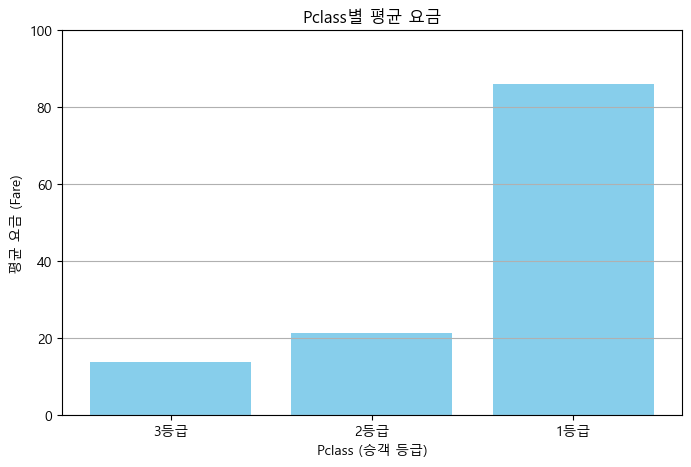

In [24]:
plt.rcParams['font.family'] = 'Malgun Gothic'

sorted_fares = [average_fare_pclass_3, average_fare_pclass_2, average_fare_pclass_1]
pclass_labels = ['3등급', '2등급', '1등급']

plt.figure(figsize=(8, 5))
plt.bar(pclass_labels, sorted_fares, color='skyblue')
plt.xlabel('Pclass (승객 등급)')
plt.ylabel('평균 요금 (Fare)')
plt.title('Pclass별 평균 요금')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

## Pclass별 생존수

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


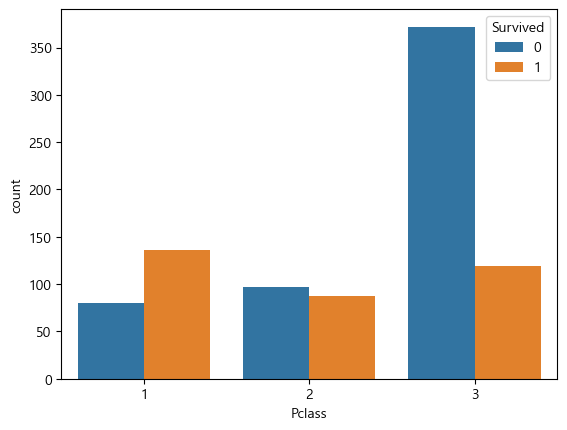

In [25]:
print(df['Pclass'].value_counts())
ax = sns.countplot(x = 'Pclass', hue = 'Survived',  data = df)

## 같이 탑승한 사람의 수(자신 제외)

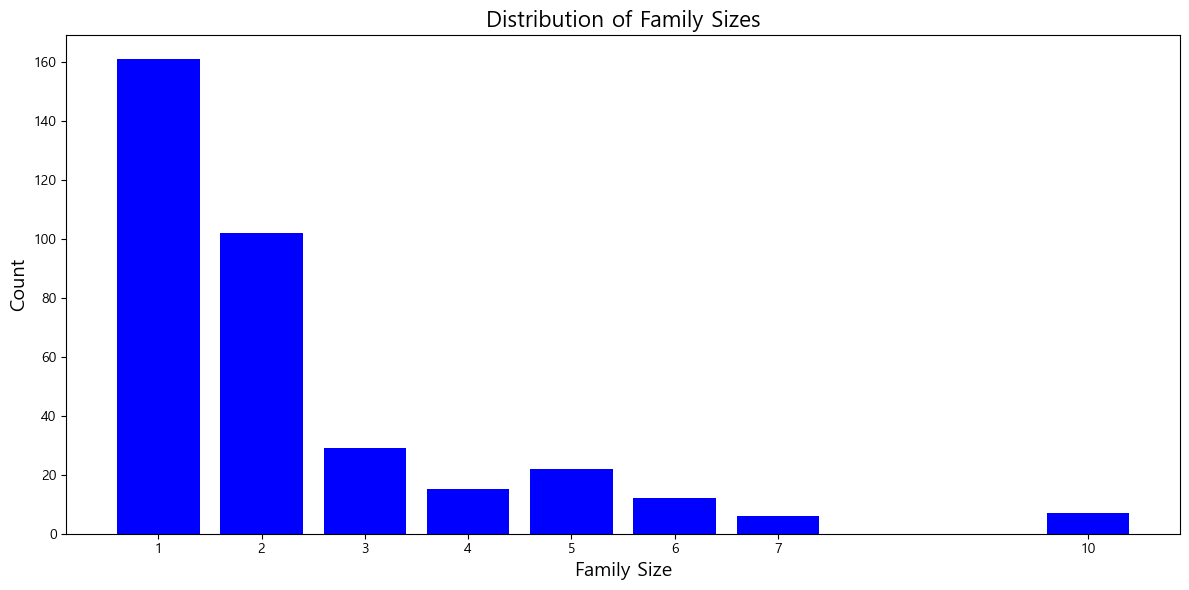

In [26]:
df['family_size'] = df['SibSp'] + df['Parch']

# 가족 크기 분포 시각화 (seaborn 없이)
plt.figure(figsize=(12, 6))
family_size_count = df['family_size'].value_counts().sort_index()
family_size_count = family_size_count[family_size_count.index != 0] #크기가 0인 혼자 탑승한 경우는 제외

plt.bar(family_size_count.index, family_size_count.values, color='blue')
plt.title('Distribution of Family Sizes', fontsize=16)
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(family_size_count.index)
plt.tight_layout()
plt.show()

In [27]:
survival_prob = df.groupby('family_size')['Survived'].mean().reset_index()

# 결과 출력
print(survival_prob)

   family_size  Survived
0            0  0.303538
1            1  0.552795
2            2  0.578431
3            3  0.724138
4            4  0.200000
5            5  0.136364
6            6  0.333333
7            7  0.000000
8           10  0.000000


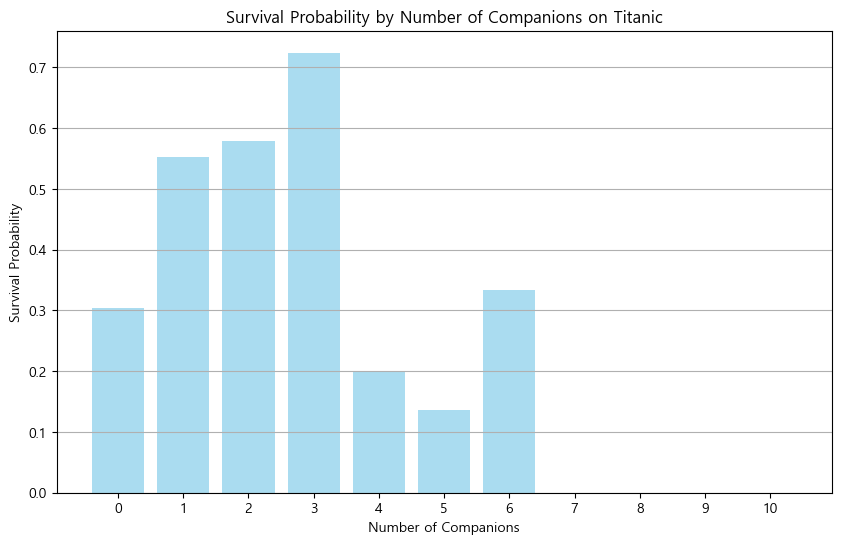

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(survival_prob['family_size'], survival_prob['Survived'], color='skyblue', alpha=0.7)
plt.title('Survival Probability by Number of Companions on Titanic')
plt.xlabel('Number of Companions')
plt.ylabel('Survival Probability')
plt.xticks(range(int(survival_prob['family_size'].max()) + 1))
plt.grid(axis='y')
plt.show()

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("./data/train.csv", index_col="PassengerId")

df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) 

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median()) 

X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8044692737430168
Confusion Matrix:
[[90 15]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

